In [2]:
import pandas as pd 

In [3]:
data=pd.read_csv('dataset.csv')

In [4]:
data.head()


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [9]:
data.columns

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('dataset.csv')



In [13]:
df = df.dropna()


In [14]:

# Encode categorical data
if df['prognosis'].dtype == 'object':
    le = LabelEncoder()
    df['prognosis'] = le.fit_transform(df['prognosis'])  # Convert prognosis to numeric


In [15]:

# Define features and target
X = df.drop(columns=['prognosis'])
y = df['prognosis']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [18]:
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = clf.predict(X_test)


In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9855769230769231


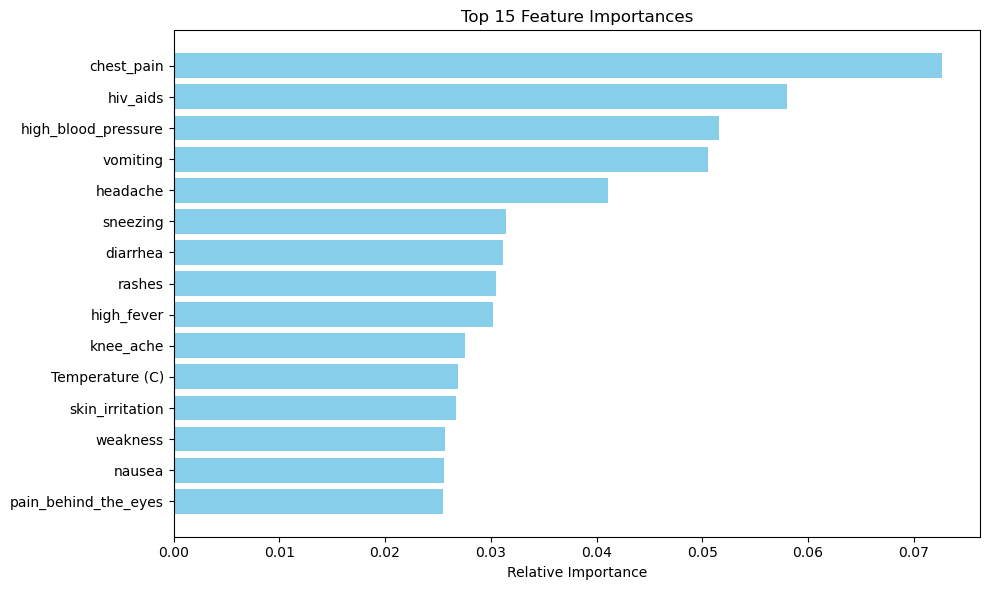

In [22]:

# Feature Importance (optional)
import matplotlib.pyplot as plt
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [24]:

# Collect user input
input_data = {}
for col in X.columns:
    val = input(f"Enter value for '{col}': ")
    try:
        input_data[col] = float(val)
    except ValueError:
        input_data[col] = int(val)

# Predict
input_df = pd.DataFrame([input_data])
pred = clf.predict(input_df)[0]
result = le.inverse_transform([pred])[0]
print("\n🩺 Predicted Prognosis:", result)


🩺 Predicted Prognosis: Sinusitis
